In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from io import StringIO
import pandas as pd

from util import *
from plotting_helpers import *

# === CONFIG ===
current_dir = os.path.dirname(os.getcwd())
FILE_PATH = os.path.join(current_dir, "data", "IBM", "HI-SmallTransactions.txt")

pattern_dict = create_pattern_dict(FILE_PATH)


# === STEP 3: Show a small sample ===



Looking for file at:
c:\Users\lucsc\Thesis\grad\grad\data\IBM\HI-SmallTransactions.txt



In [9]:
bipartite_data = filter_dict(pattern_dict, "STACK" )  # Example usage function

bipartite_data

[('2022/09/02 12:36',
  '0223',
  '8000DD890',
  '0040312',
  '80F52D550',
  '14153.46',
  'Swiss Franc',
  '14153.46',
  'Swiss Franc',
  'ACH',
  '1'),
 ('2022/09/03 19:52',
  '0040312',
  '80F52D550',
  '0023370',
  '80BEA98A0',
  '11975.53',
  'UK Pound',
  '11975.53',
  'UK Pound',
  'ACH',
  '1'),
 ('2022/09/01 10:19',
  '018617',
  '8038D3520',
  '024482',
  '801C0F2B0',
  '13712.96',
  'Euro',
  '13712.96',
  'Euro',
  'ACH',
  '1'),
 ('2022/09/03 05:06',
  '024482',
  '801C0F2B0',
  '0214',
  '80C1B9E20',
  '333126.09',
  'Mexican Peso',
  '333126.09',
  'Mexican Peso',
  'ACH',
  '1'),
 ('2022/09/01 09:22',
  '0040836',
  '80F6B88B0',
  '0016606',
  '8064545E0',
  '11800.69',
  'US Dollar',
  '11800.69',
  'US Dollar',
  'ACH',
  '1'),
 ('2022/09/03 08:27',
  '0016606',
  '8064545E0',
  '002454',
  '80662A070',
  '12331.00',
  'US Dollar',
  '12331.00',
  'US Dollar',
  'ACH',
  '1'),
 ('2022/09/02 07:21',
  '021749',
  '8014BDC90',
  '0214050',
  '80537F610',
  '317448.19',


✅ Saved plot for 'FAN-OUT:  Max 16-degree Fan-Out' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\FANOUT__Max_16degree_FanOut.png
✅ Saved plot for 'CYCLE:  Max 10 hops' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\CYCLE__Max_10_hops.png
✅ Saved plot for 'GATHER-SCATTER:  Max 3-degree Fan-In' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\GATHERSCATTER__Max_3degree_FanIn.png
✅ Saved plot for 'STACK' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\STACK.png
✅ Saved plot for 'GATHER-SCATTER:  Max 13-degree Fan-In' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\GATHERSCATTER__Max_13degree_FanIn.png
✅ Saved plot for 'RANDOM:  Max 5 hops' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\RANDOM__Max_5_hops.png
✅ Saved plot for 'CYCLE:  Max 10 hops_dup2' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\CYCLE__Max_10_hops_dup2.png
✅ Saved plot for 'FAN-OUT:  Max 12-degree Fan-Out' to: c:\Users\lucsc\Thesis\grad\gra

C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\3751724008.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=15, edge_color="gray")


✅ Saved plot for 'GATHER-SCATTER:  Max 2-degree Fan-In' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\GATHERSCATTER__Max_2degree_FanIn.png
✅ Saved plot for 'FAN-IN:  Max 2-degree Fan-In' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\FANIN__Max_2degree_FanIn.png
✅ Saved plot for 'BIPARTITE_dup2' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\BIPARTITE_dup2.png
✅ Saved plot for 'FAN-IN:  Max 16-degree Fan-In' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\FANIN__Max_16degree_FanIn.png
✅ Saved plot for 'GATHER-SCATTER:  Max 2-degree Fan-In_dup2' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\GATHERSCATTER__Max_2degree_FanIn_dup2.png
✅ Saved plot for 'RANDOM:  Max 3 hops' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\RANDOM__Max_3_hops.png
✅ Saved plot for 'SCATTER-GATHER' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\SCATTERGATHER.png
✅ Saved plot for 'CYCLE:  Max 10 hops_dup3' to: c:\Users\lucsc\Thesi

KeyboardInterrupt: 

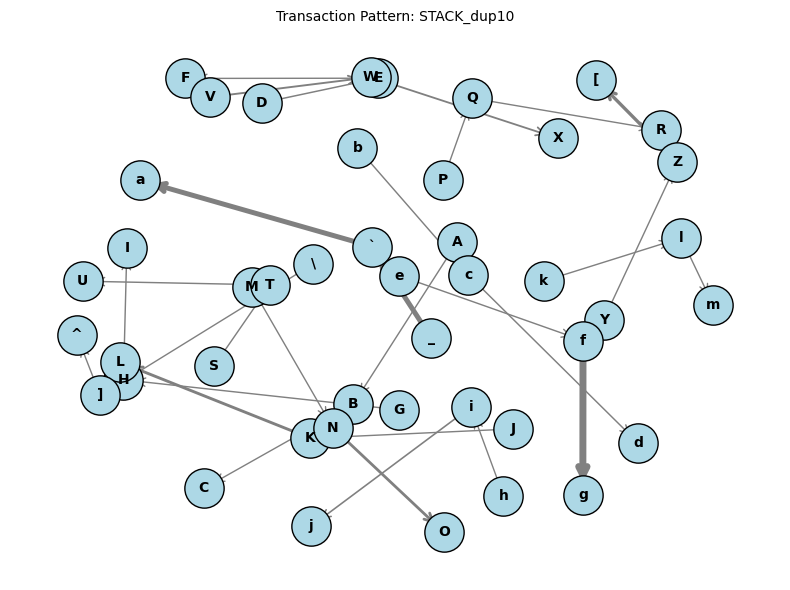

In [3]:
import os
import matplotlib.pyplot as plt
import networkx as nx

# === CONFIG ===
output_dir = os.path.join(os.getcwd(), "pattern_plots")
os.makedirs(output_dir, exist_ok=True)

# === COLUMN ORDER (for reference) ===
columns = [
    "Timestamp", "From Bank", "From Account", "To Bank", "To Account",
    "Amount Received", "Receiving Currency", "Amount Paid", "Payment Currency",
    "Payment Format", "Is Laundering"
]

# === STEP 1: Function to generate graph plots ===
def plot_laundering_pattern(key, transactions):
    """
    Create and save a plot showing the transaction network for a given pattern.
    """
    G = nx.DiGraph()

    # Map full account IDs to short names (A, B, C, ...)
    node_map = {}
    next_label = 65  # ASCII 'A'

    for t in transactions:
        data = dict(zip(columns, t))

        src = f"{data['From Bank']}_{data['From Account']}"
        dst = f"{data['To Bank']}_{data['To Account']}"

        # Assign short labels
        if src not in node_map:
            node_map[src] = chr(next_label)
            next_label += 1
        if dst not in node_map:
            node_map[dst] = chr(next_label)
            next_label += 1

        G.add_edge(
            node_map[src],
            node_map[dst],
            amount=float(data["Amount Paid"]),
            currency=data["Payment Currency"]
        )

    # Determine edge widths based on transaction amount
    amounts = [d["amount"] for _, _, d in G.edges(data=True)]
    if len(amounts) > 0:
        min_amt, max_amt = min(amounts), max(amounts)
        widths = [
            1 + 4 * ((amt - min_amt) / (max_amt - min_amt + 1e-9))
            for amt in amounts
        ]
    else:
        widths = []

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42, k=0.6)
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue", edgecolors="black")
    nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=15, edge_color="gray")
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
    plt.title(f"Transaction Pattern: {key}", fontsize=10)
    plt.axis("off")
    
    # Save plot
    safe_key = key.replace(":", "").replace(" ", "_").replace("-", "")
    out_path = os.path.join(output_dir, f"{safe_key}.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()

    print(f"✅ Saved plot for '{key}' to: {out_path}")

# === STEP 2: Generate all plots ===
for pattern_key, tx_list in pattern_dict.items():
    plot_laundering_pattern(pattern_key, tx_list)


In [10]:
df_data = pd.DataFrame(bipartite_data, columns=columns)
# for t in bipartite_data:
#     data = dict(zip(columns, t))
#     data['src'] = f"{data['From Bank']}_{data['From Account']}"
#     data['dst'] = f"{data['To Bank']}_{data['To Account']}"

In [11]:
df_data['src'] = df_data['From Bank'] + "_" + df_data['From Account']
df_data['dst'] = df_data['To Bank'] + "_" + df_data['To Account']

In [12]:
def plot_laundering_pattern(key, transactions):
    """
    Create and save a plot showing the transaction network for a given pattern,
    with improved spacing and reduced overlap.
    """
    import networkx as nx
    import matplotlib.pyplot as plt
    import os

    G = nx.DiGraph()

    # Map full account IDs to short labels (A, B, C...)
    node_map = {}
    next_label = 65   # ASCII A

    for t in transactions:
        data = dict(zip(columns, t))

        src = f"{data['From Bank']}_{data['From Account']}"
        dst = f"{data['To Bank']}_{data['To Account']}"

        if src not in node_map:
            node_map[src] = chr(next_label); next_label += 1
        if dst not in node_map:
            node_map[dst] = chr(next_label); next_label += 1

        G.add_edge(
            node_map[src],
            node_map[dst],
            amount=float(data["Amount Paid"]),
            currency=data["Payment Currency"]
        )

    # Determine edge widths
    amounts = [d["amount"] for _, _, d in G.edges(data=True)]
    if amounts:
        min_amt, max_amt = min(amounts), max(amounts)
        widths = [
            1 + 4 * ((amt - min_amt) / (max_amt - min_amt + 1e-9))
            for amt in amounts
        ]
    else:
        widths = []

    # Try Graphviz layout first (best for avoiding overlap)
    try:
        from networkx.drawing.nx_pydot import graphviz_layout
        pos = graphviz_layout(G, prog="dot")  # hierarchical, clean
    except Exception:
        # Fallback: tuned spring layout
        pos = nx.spring_layout(
            G, 
            seed=42,
            k=1.0,        # increase repulsion → nodes spread apart
            iterations=200,
            scale=3.0
        )

    # Resize figure based on graph size
    base_size = 6
    n = max(1, len(G.nodes()))
    fig_size = (base_size + n * 0.3, base_size + n * 0.3)

    plt.figure(figsize=fig_size)

    nx.draw_networkx_nodes(
        G, pos,
        node_size=900,
        node_color="lightblue",
        edgecolors="black",
        linewidths=1.2
    )

    # Use curved edges to prevent arrow overlap
    nx.draw_networkx_edges(
        G, pos,
        width=widths,
        arrowstyle="-|>",
        arrowsize=18,
        connectionstyle="arc3,rad=0.15",
        edge_color="gray"
    )

    # Slight label offset to avoid overlap
    nx.draw_networkx_labels(
        G, pos,
        font_size=10,
        font_weight="bold",
        verticalalignment="center_baseline"
    )

    plt.title(f"Transaction Pattern: {key}", fontsize=12)
    plt.axis("off")

    safe_key = key.replace(":", "").replace(" ", "_").replace("-", "")
    out_path = os.path.join(output_dir, f"{safe_key}.png")

    plt.tight_layout()
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"✅ Saved plot for '{key}' to: {out_path}")


In [13]:
df_data.sort_values(by=['src'], inplace=True)
len(df_data['dst'].unique())

# 1. detect duplicates inside each column
dup_col1 = df_data['src'].duplicated(keep=False)
dup_col2 = df_data['dst'].duplicated(keep=False)

# 2. detect values that appear in BOTH columns
values_in_both = df_data['src'].isin(df_data['dst']) | df_data['dst'].isin(df_data['src'])

# 3. final mask: keep rows where ANY of the above is true
mask = dup_col1 | dup_col2 | values_in_both

df_filtered = df_data[mask]

plot_laundering_pattern("duplicate bipartite filtered", df_filtered.values.tolist())

C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:48: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")  # hierarchical, clean


"dot" with args ['-Tdot', 'C:\\Users\\lucsc\\AppData\\Local\\Temp\\tmpdztwk5l9'] returned code: 1

stdout, stderr:
 b''
b"Error: C:\\Users\\lucsc\\AppData\\Local\\Temp\\tmpdztwk5l9: syntax error in line 30 near ']'\r\n"



C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 127 () missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 132 (\x84) missing from cur

✅ Saved plot for 'duplicate bipartite filtered' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\duplicate_bipartite_filtered.png


In [15]:
plot_laundering_pattern("STACKfiltered", df_filtered.values.tolist())

C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:48: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")  # hierarchical, clean


"dot" with args ['-Tdot', 'C:\\Users\\lucsc\\AppData\\Local\\Temp\\tmpyb_szoft'] returned code: 1

stdout, stderr:
 b''
b"Error: C:\\Users\\lucsc\\AppData\\Local\\Temp\\tmpyb_szoft: syntax error in line 30 near ']'\r\n"



C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 127 () missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(out_path, dpi=300, bbox_inches="tight")
C:\Users\lucsc\AppData\Local\Temp\ipykernel_5304\1541505771.py:99: UserWarning: Glyph 132 (\x84) missing from cur

✅ Saved plot for 'STACKfiltered' to: c:\Users\lucsc\Thesis\grad\grad\dataprep\pattern_plots\STACKfiltered.png


In [16]:
import pandas as pd

current_dir = os.path.dirname(os.getcwd())
CSV_PATH = os.path.join(current_dir, "data", "IBM", "Hi-Small_Trans.csv")
START_ACCOUNT = "070_100428660"

full_data = pd.read_csv(CSV_PATH)

In [17]:
full_data[full_data['Is Laundering'] ==1]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4742,2022/09/01 00:21,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1
40621,2022/09/01 00:03,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1
69152,2022/09/01 00:01,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1
85763,2022/09/01 00:03,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1
90684,2022/09/01 00:23,70,100428660,32375,80E480620,14288.83,US Dollar,14288.83,US Dollar,Cash,1
...,...,...,...,...,...,...,...,...,...,...,...
5071168,2022/09/10 23:29,111433,8065C2380,21550,8065C69E0,7773.42,US Dollar,7773.42,US Dollar,ACH,1
5073375,2022/09/10 23:07,9,80727F930,219557,8072A28C0,448920.65,Ruble,448920.65,Ruble,Cheque,1
5074248,2022/09/12 03:34,222,812D127D0,50202,812D129C0,20085.71,Saudi Riyal,20085.71,Saudi Riyal,ACH,1
5075056,2022/09/10 23:43,17327,8095F6C20,15695,8095F6C70,3314.36,US Dollar,3314.36,US Dollar,ACH,1


In [18]:
# Convert numeric fields safely
full_data["Amount Paid"] = full_data["Amount Paid"].astype(float)
full_data["Amount Received"] = full_data["Amount Received"].astype(float)
# full_data['From'] = full_data['From Bank'].astype(str) + '_' + full_data['Account'].astype(str)
# full_data['To'] = full_data['To Bank'].astype(str) + '_' + full_data['Account.1'].astype(str)


In [ ]:
import pandas as pd

def gather_suspicious_network(df, start_node, max_depth=None):
    """
    Recursively gather all suspicious nodes (Is Laundering == 1)
    connected to a given node.

    Parameters
    ----------
    df : pd.DataFrame
        Transaction dataset with columns:
        ['From_Node', 'To_Node', 'Is Laundering']
    start_node : str
        Node ID to start from (e.g., 'BANK1_12345')
    max_depth : int or None
        Optional depth limit for traversal.

    Returns
    -------
    connected_df : pd.DataFrame
        Subset of df with only suspicious connected transactions.
    connected_nodes : set
        All suspicious connected nodes found.
    """

    # Filter only suspicious transactions
    suspicious_df = df[df["Is Laundering"] == 1].copy()
    print(suspicious_df.head())
    if start_node not in set(suspicious_df["From_Node"]) | set(suspicious_df["To_Node"]):
        raise ValueError(f"Node '{start_node}' not found among suspicious nodes.")

    connected_nodes = {start_node}
    frontier = {start_node}
    depth = 0

    while frontier and (max_depth is None or depth < max_depth):
        # Find all transactions involving current frontier nodes
        mask = suspicious_df["From_Node"].isin(frontier) | suspicious_df["To_Node"].isin(frontier)
        subset = suspicious_df[mask]

        # Gather all suspicious nodes connected to these
        new_nodes = set(subset["From_Node"]) | set(subset["To_Node"])
        new_nodes -= connected_nodes

        if not new_nodes:
            break

        connected_nodes |= new_nodes
        frontier = new_nodes
        depth += 1

    connected_df = suspicious_df[
        suspicious_df["From_Node"].isin(connected_nodes)
        | suspicious_df["To_Node"].isin(connected_nodes)
    ]

    return connected_df, connected_nodes


def visualize_suspicious_network(connected_df, start_node, save_folder="suspicious_plots"):
    """
    Visualize and save the suspicious subnetwork as a PNG image.

    Parameters
    ----------
    connected_df : pd.DataFrame
        Output from gather_suspicious_network
    start_node : str
        The node where the search started
    save_folder : str
        Folder where the plot will be saved
    """
    os.makedirs(save_folder, exist_ok=True)

    # Create a directed graph
    G = nx.from_pandas_edgelist(
        connected_df,
        source="From_Node",
        target="To_Node",
        create_using=nx.DiGraph()
    )

    # Color nodes (all suspicious = red, start node = gold)
    node_colors = []
    for node in G.nodes():
        if node == start_node:
            node_colors.append("gold")
        else:
            node_colors.append("red")

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.4, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=800,
        font_size=8,
        font_weight="bold",
        arrows=True,
        alpha=0.8,
    )

    plt.title(f"Suspicious Network starting from {start_node}", fontsize=12)
    plt.tight_layout()

    # Save plot
    save_path = os.path.join(save_folder, f"suspicious_network_{start_node}.png")
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"📈 Saved visualization to {save_path}")

    
# Load your data first

df = pd.read_csv(CSV_PATH, dtype=str)
df["Is Laundering"] = pd.to_numeric(df["Is Laundering"], errors="coerce").fillna(2).astype(int)
df["From_Node"] = df["From Bank"].astype(str) + "_" + df["Account"].astype(str)
df["To_Node"] = df["To Bank"].astype(str) + "_" + df["Account.1"].astype(str)

connected_df, connected_nodes = gather_suspicious_network(df, start_node=START_ACCOUNT)

print(f"Found {len(connected_nodes)} suspicious connected nodes")
print(f"Found {len(connected_df)} suspicious related transactions")

# Visualize the suspicious network
visualize_suspicious_network(connected_df, start_node=START_ACCOUNT)

              Timestamp From Bank    Account  To Bank  Account.1  \
4742   2022/09/01 00:21       070  100428660   001124  800825340   
40621  2022/09/01 00:03       070  100428660   011474  805B716C0   
69152  2022/09/01 00:01       070  100428660   015980  80B39E7B0   
85763  2022/09/01 00:03       070  100428660  0113798  80DC756E0   
90684  2022/09/01 00:23       070  100428660  0032375  80E480620   

      Amount Received Receiving Currency  Amount Paid Payment Currency  \
4742        389769.39          US Dollar    389769.39        US Dollar   
40621        29024.33          US Dollar     29024.33        US Dollar   
69152          792.92          US Dollar       792.92        US Dollar   
85763     13171425.53          US Dollar  13171425.53        US Dollar   
90684        14288.83          US Dollar     14288.83        US Dollar   

      Payment Format  Is Laundering      From_Node            To_Node  
4742          Cheque              1  070_100428660   001124_800825340  
40

C:\Users\lucsc\AppData\Local\Temp\ipykernel_17004\3056135401.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📈 Saved visualization to suspicious_plots\suspicious_network_070_100428660.png


In [ ]:
pattern_dict['STACK']

[('2022/09/02 12:36',
  '0223',
  '8000DD890',
  '0040312',
  '80F52D550',
  '14153.46',
  'Swiss Franc',
  '14153.46',
  'Swiss Franc',
  'ACH',
  '1'),
 ('2022/09/03 19:52',
  '0040312',
  '80F52D550',
  '0023370',
  '80BEA98A0',
  '11975.53',
  'UK Pound',
  '11975.53',
  'UK Pound',
  'ACH',
  '1'),
 ('2022/09/01 10:19',
  '018617',
  '8038D3520',
  '024482',
  '801C0F2B0',
  '13712.96',
  'Euro',
  '13712.96',
  'Euro',
  'ACH',
  '1'),
 ('2022/09/03 05:06',
  '024482',
  '801C0F2B0',
  '0214',
  '80C1B9E20',
  '333126.09',
  'Mexican Peso',
  '333126.09',
  'Mexican Peso',
  'ACH',
  '1'),
 ('2022/09/01 09:22',
  '0040836',
  '80F6B88B0',
  '0016606',
  '8064545E0',
  '11800.69',
  'US Dollar',
  '11800.69',
  'US Dollar',
  'ACH',
  '1'),
 ('2022/09/03 08:27',
  '0016606',
  '8064545E0',
  '002454',
  '80662A070',
  '12331.00',
  'US Dollar',
  '12331.00',
  'US Dollar',
  'ACH',
  '1'),
 ('2022/09/02 07:21',
  '021749',
  '8014BDC90',
  '0214050',
  '80537F610',
  '317448.19',


In [ ]:
pattern_df = pd.DataFrame(pattern_dict['STACK'])
pattern_df.columns = columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from io import StringIO

# --- Paste your data here ---
data = """2022/09/02 12:36,0223,8000DD890,0040312,80F52D550,14153.46,Swiss Franc,14153.46,Swiss Franc,ACH,1
2022/09/03 19:52,0040312,80F52D550,0023370,80BEA98A0,11975.53,UK Pound,11975.53,UK Pound,ACH,1
2022/09/01 10:19,018617,8038D3520,024482,801C0F2B0,13712.96,Euro,13712.96,Euro,ACH,1
2022/09/03 05:06,024482,801C0F2B0,0214,80C1B9E20,333126.09,Mexican Peso,333126.09,Mexican Peso,ACH,1
2022/09/01 09:22,0040836,80F6B88B0,0016606,8064545E0,11800.69,US Dollar,11800.69,US Dollar,ACH,1
2022/09/03 08:27,0016606,8064545E0,002454,80662A070,12331.00,US Dollar,12331.00,US Dollar,ACH,1
2022/09/02 07:21,021749,8014BDC90,0214050,80537F610,317448.19,Rupee,317448.19,Rupee,ACH,1
2022/09/04 19:11,0214050,80537F610,0017554,806C8F2A0,349281.29,Ruble,349281.29,Ruble,ACH,1
2022/09/01 15:05,023842,80195DE20,002845,801E2BC20,277.59,US Dollar,277.59,US Dollar,ACH,1
2022/09/04 09:31,002845,801E2BC20,0220504,807E97240,230.27,UK Pound,230.27,UK Pound,ACH,1
2022/09/01 14:28,010,8009CF210,011318,8011AB110,11964.97,US Dollar,11964.97,US Dollar,ACH,1
2022/09/03 09:33,011318,8011AB110,028255,806C7CF80,11521.43,US Dollar,11521.43,US Dollar,ACH,1
2022/09/02 19:34,003229,803FF9220,0220271,81114D580,10295.53,US Dollar,10295.53,US Dollar,ACH,1
2022/09/04 04:56,0220271,81114D580,013145,809BD8BC0,9743.15,US Dollar,9743.15,US Dollar,ACH,1
2022/09/02 07:37,0115700,80B3E96E0,014099,801F8CCB0,17684.19,US Dollar,17684.19,US Dollar,ACH,1
2022/09/03 04:39,014099,801F8CCB0,024144,801C92FF0,14819.83,Euro,14819.83,Euro,ACH,1
2022/09/01 18:17,022806,807A61380,006179,802D53D80,16345.56,US Dollar,16345.56,US Dollar,ACH,1
2022/09/04 01:29,006179,802D53D80,0240229,80EE2B9B0,14199.39,Swiss Franc,14199.39,Swiss Franc,ACH,1
2022/09/01 08:40,0214,80B7347A0,00410,802D878C0,6702.62,Euro,6702.62,Euro,ACH,1
2022/09/03 01:44,00410,802D878C0,003229,8063F5290,7617.17,US Dollar,7617.17,US Dollar,ACH,1
2022/09/01 16:51,02591,80A1C7710,024850,80A09CF50,3724.19,Euro,3724.19,Euro,ACH,1
2022/09/02 12:47,024850,80A09CF50,023833,8067AD0A0,4646.02,US Dollar,4646.02,US Dollar,ACH,1"""

# data = pattern_dict['STACK']
# print(data)
# --- Parse into DataFrame ---
cols = [
    "timestamp", "sender_id", "sender_acct", "receiver_id", "receiver_acct",
    "amount", "currency", "amount2", "currency2", "method", "flag"
]

df = pd.read_csv(StringIO(data), header=None)
df.columns = cols

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["amount"] = df["amount"].astype(float)

df["From_Node"] = df["sender_id"].astype(str) + "_" + df["sender_acct"].astype(str)
df["To_Node"] = df["receiver_id"].astype(str) + "_" + df["receiver_acct"].astype(str)

entity_path = os.path.join(current_dir, "data", "IBM", "Hi-Small_accounts.csv")

entity_df = pd.read_csv(entity_path, dtype=str)

entity_df["bank_id"] = entity_df["Bank ID"].astype(str) + "_" + entity_df["Account Number"].astype(str)

# Merge sender entity
merged_df = df.merge(
    entity_df[['bank_id', 'Entity Name']],
    how='left',
    left_on='From_Node',
    right_on='bank_id'
).rename(columns={'Entity Name': 'sender_entity'}).drop('bank_id', axis=1)

# Merge receiver entity
merged_df = merged_df.merge(
    entity_df[['bank_id', 'Entity Name']],
    how='left',
    left_on='To_Node',
    right_on='bank_id'
).rename(columns={'Entity Name': 'receiver_entity'}).drop('bank_id', axis=1)


# Preview result
merged_df.head()



,timestamp,sender_id,sender_acct,receiver_id,receiver_acct,amount,currency,amount2,currency2,method,flag,From_Node,To_Node,sender_entity,receiver_entity
0,2022-09-02 12:36:00,223,8000DD890,40312,80F52D550,14153.46,Swiss Franc,14153.46,Swiss Franc,ACH,1,223_8000DD890,40312_80F52D550,Corporation #37872,Corporation #34867
1,2022-09-03 19:52:00,40312,80F52D550,23370,80BEA98A0,11975.53,UK Pound,11975.53,UK Pound,ACH,1,40312_80F52D550,23370_80BEA98A0,Corporation #34867,Sole Proprietorship #34405
2,2022-09-01 10:19:00,18617,8038D3520,24482,801C0F2B0,13712.96,Euro,13712.96,Euro,ACH,1,18617_8038D3520,24482_801C0F2B0,Corporation #13190,Partnership #30131
3,2022-09-03 05:06:00,24482,801C0F2B0,214,80C1B9E20,333126.09,Mexican Peso,333126.09,Mexican Peso,ACH,1,24482_801C0F2B0,214_80C1B9E20,Partnership #30131,Corporation #3948
4,2022-09-01 09:22:00,40836,80F6B88B0,16606,8064545E0,11800.69,US Dollar,11800.69,US Dollar,ACH,1,40836_80F6B88B0,16606_8064545E0,Partnership #37691,Corporation #8544


In [ ]:
data2 = pattern_dict['STACK']

df2 = pd.DataFrame(data2, columns=cols)

df2

,timestamp,sender_id,sender_acct,receiver_id,receiver_acct,amount,currency,amount2,currency2,method,flag
0,2022/09/02 12:36,0223,8000DD890,0040312,80F52D550,14153.46,Swiss Franc,14153.46,Swiss Franc,ACH,1
1,2022/09/03 19:52,0040312,80F52D550,0023370,80BEA98A0,11975.53,UK Pound,11975.53,UK Pound,ACH,1
2,2022/09/01 10:19,018617,8038D3520,024482,801C0F2B0,13712.96,Euro,13712.96,Euro,ACH,1
3,2022/09/03 05:06,024482,801C0F2B0,0214,80C1B9E20,333126.09,Mexican Peso,333126.09,Mexican Peso,ACH,1
4,2022/09/01 09:22,0040836,80F6B88B0,0016606,8064545E0,11800.69,US Dollar,11800.69,US Dollar,ACH,1
5,2022/09/03 08:27,0016606,8064545E0,002454,80662A070,12331.00,US Dollar,12331.00,US Dollar,ACH,1
6,2022/09/02 07:21,021749,8014BDC90,0214050,80537F610,317448.19,Rupee,317448.19,Rupee,ACH,1
7,2022/09/04 19:11,0214050,80537F610,0017554,806C8F2A0,349281.29,Ruble,349281.29,Ruble,ACH,1
8,2022/09/01 15:05,023842,80195DE20,002845,801E2BC20,277.59,US Dollar,277.59,US Dollar,ACH,1
9,2022/09/04 09:31,002845,801E2BC20,0220504,807E97240,230.27,UK Pound,230.27,UK Pound,ACH,1


In [ ]:
df

,timestamp,sender_id,sender_acct,receiver_id,receiver_acct,amount,currency,amount2,currency2,method,flag,From_Node,To_Node
0,2022-09-02 12:36:00,223,8000DD890,40312,80F52D550,14153.46,Swiss Franc,14153.46,Swiss Franc,ACH,1,223_8000DD890,40312_80F52D550
1,2022-09-03 19:52:00,40312,80F52D550,23370,80BEA98A0,11975.53,UK Pound,11975.53,UK Pound,ACH,1,40312_80F52D550,23370_80BEA98A0
2,2022-09-01 10:19:00,18617,8038D3520,24482,801C0F2B0,13712.96,Euro,13712.96,Euro,ACH,1,18617_8038D3520,24482_801C0F2B0
3,2022-09-03 05:06:00,24482,801C0F2B0,214,80C1B9E20,333126.09,Mexican Peso,333126.09,Mexican Peso,ACH,1,24482_801C0F2B0,214_80C1B9E20
4,2022-09-01 09:22:00,40836,80F6B88B0,16606,8064545E0,11800.69,US Dollar,11800.69,US Dollar,ACH,1,40836_80F6B88B0,16606_8064545E0
5,2022-09-03 08:27:00,16606,8064545E0,2454,80662A070,12331.00,US Dollar,12331.00,US Dollar,ACH,1,16606_8064545E0,2454_80662A070
6,2022-09-02 07:21:00,21749,8014BDC90,214050,80537F610,317448.19,Rupee,317448.19,Rupee,ACH,1,21749_8014BDC90,214050_80537F610
7,2022-09-04 19:11:00,214050,80537F610,17554,806C8F2A0,349281.29,Ruble,349281.29,Ruble,ACH,1,214050_80537F610,17554_806C8F2A0
8,2022-09-01 15:05:00,23842,80195DE20,2845,801E2BC20,277.59,US Dollar,277.59,US Dollar,ACH,1,23842_80195DE20,2845_801E2BC20
9,2022-09-04 09:31:00,2845,801E2BC20,220504,807E97240,230.27,UK Pound,230.27,UK Pound,ACH,1,2845_801E2BC20,220504_807E97240


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

# ----------------------------------------------------
# 1. Load tuple-list data from your dict
# ----------------------------------------------------
data = pattern_dict["STACK"]

cols = [
    "timestamp", "sender_id", "sender_acct", "receiver_id", "receiver_acct",
    "amount", "currency", "amount2", "currency2", "method", "flag"
]

df = pd.DataFrame(data, columns=cols)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["amount"] = df["amount"].astype(float)

# Strip whitespace, convert to string
for col in ["sender_id", "sender_acct", "receiver_id", "receiver_acct"]:
    df[col] = df[col].astype(str).str.strip()

entity_path = os.path.join(current_dir, "data", "IBM", "Hi-Small_accounts.csv")
entity_df = pd.read_csv(entity_path, dtype=str)

for col in ["Bank ID", "Account Number"]:
    entity_df[col] = entity_df[col].astype(str).str.strip()

# --- Clean IDs: remove leading zeros ---
df["sender_id"]   = df["sender_id"].astype(str).str.lstrip("0")
df["receiver_id"] = df["receiver_id"].astype(str).str.lstrip("0")

entity_df["Bank ID"] = entity_df["Bank ID"].astype(str).str.lstrip("0")

df["From_Node"] = df["sender_id"] + "_" + df["sender_acct"]
df["To_Node"]   = df["receiver_id"] + "_" + df["receiver_acct"]

entity_df["bank_id"] = entity_df["Bank ID"] + "_" + entity_df["Account Number"]

# Debug print example keys
print("\nExample From_Node:", df["From_Node"].iloc[0])
print("Example To_Node:  ", df["To_Node"].iloc[0])
print("\nExample bank_id:", entity_df["bank_id"].iloc[0])

# ----------------------------------------------------
# 5. Merge sender entity
# ----------------------------------------------------
merged_df = df.merge(
    entity_df[['bank_id', 'Entity ID']],
    how='left',
    left_on='From_Node',
    right_on='bank_id'
).rename(columns={'Entity ID': 'sender_entity'}).drop(columns=['bank_id'])

# ----------------------------------------------------
# 6. Merge receiver entity
# ----------------------------------------------------
merged_df = merged_df.merge(
    entity_df[['bank_id', 'Entity ID']],
    how='left',
    left_on='To_Node',
    right_on='bank_id'
).rename(columns={'Entity ID': 'receiver_entity'}).drop(columns=['bank_id'])

# ----------------------------------------------------
# 7. Preview result
# ----------------------------------------------------
# print("\nMerged result preview:")
print(merged_df.head())



Example From_Node: 223_8000DD890
Example To_Node:   40312_80F52D550

Example bank_id: 331579_80B779D80
            timestamp sender_id sender_acct receiver_id receiver_acct  \
0 2022-09-02 12:36:00       223   8000DD890       40312     80F52D550   
1 2022-09-03 19:52:00     40312   80F52D550       23370     80BEA98A0   
2 2022-09-01 10:19:00     18617   8038D3520       24482     801C0F2B0   
3 2022-09-03 05:06:00     24482   801C0F2B0         214     80C1B9E20   
4 2022-09-01 09:22:00     40836   80F6B88B0       16606     8064545E0   

      amount      currency    amount2     currency2 method flag  \
0   14153.46   Swiss Franc   14153.46   Swiss Franc    ACH    1   
1   11975.53      UK Pound   11975.53      UK Pound    ACH    1   
2   13712.96          Euro   13712.96          Euro    ACH    1   
3  333126.09  Mexican Peso  333126.09  Mexican Peso    ACH    1   
4   11800.69     US Dollar   11800.69     US Dollar    ACH    1   

         From_Node          To_Node sender_entity rece

In [ ]:
entity_df.head()


,Bank Name,Bank ID,Account Number,Entity ID,Entity Name,bank_id
0,Portugal Bank #4507,331579,80B779D80,80062E240,Sole Proprietorship #50438,331579_80B779D80
1,Canada Bank #27,210,809D86900,800C998A0,Corporation #33520,210_809D86900
2,UK Bank #33,21884,80812BE00,800C47F50,Partnership #35397,21884_80812BE00
3,Germany Bank #4815,32742,81047F300,80096F0B0,Corporation #48813,32742_81047F300
4,National Bank of Harrisburg,127390,80BD8CF00,800FB8760,Corporation #889,127390_80BD8CF00


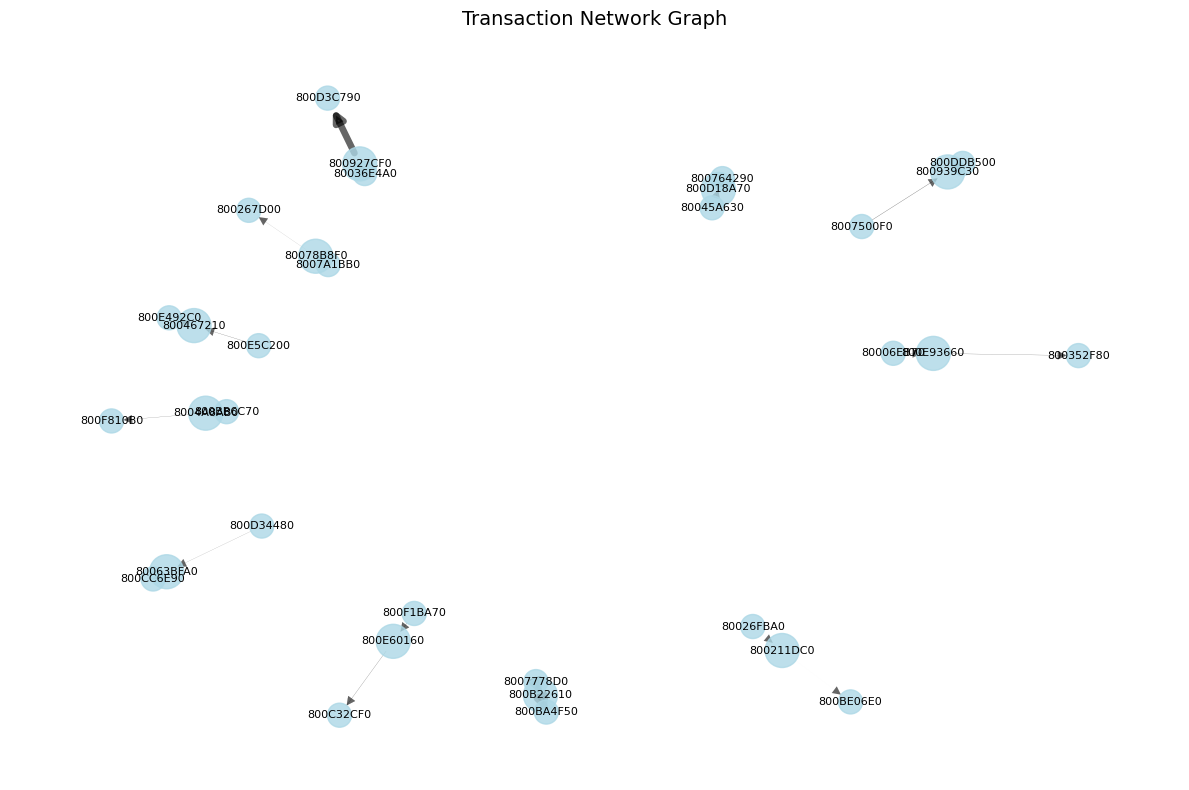

In [ ]:
# --- Create directed graph ---
G = nx.DiGraph()

for _, row in merged_df.iterrows():
    sender = row["sender_entity"]
    receiver = row["receiver_entity"]
    amount = row["amount"]
    currency = row["currency"]
    
    # Add weighted edge
    if G.has_edge(sender, receiver):
        G[sender][receiver]["weight"] += amount
    else:
        G.add_edge(sender, receiver, weight=amount, currency=currency)

# --- Node sizes & edge widths ---
node_sizes = [G.degree(n) * 300 for n in G.nodes()]
edge_weights = [G[u][v]['weight'] / max(merged_df['amount']) * 5 for u, v in G.edges()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6, arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Transaction Network Graph", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


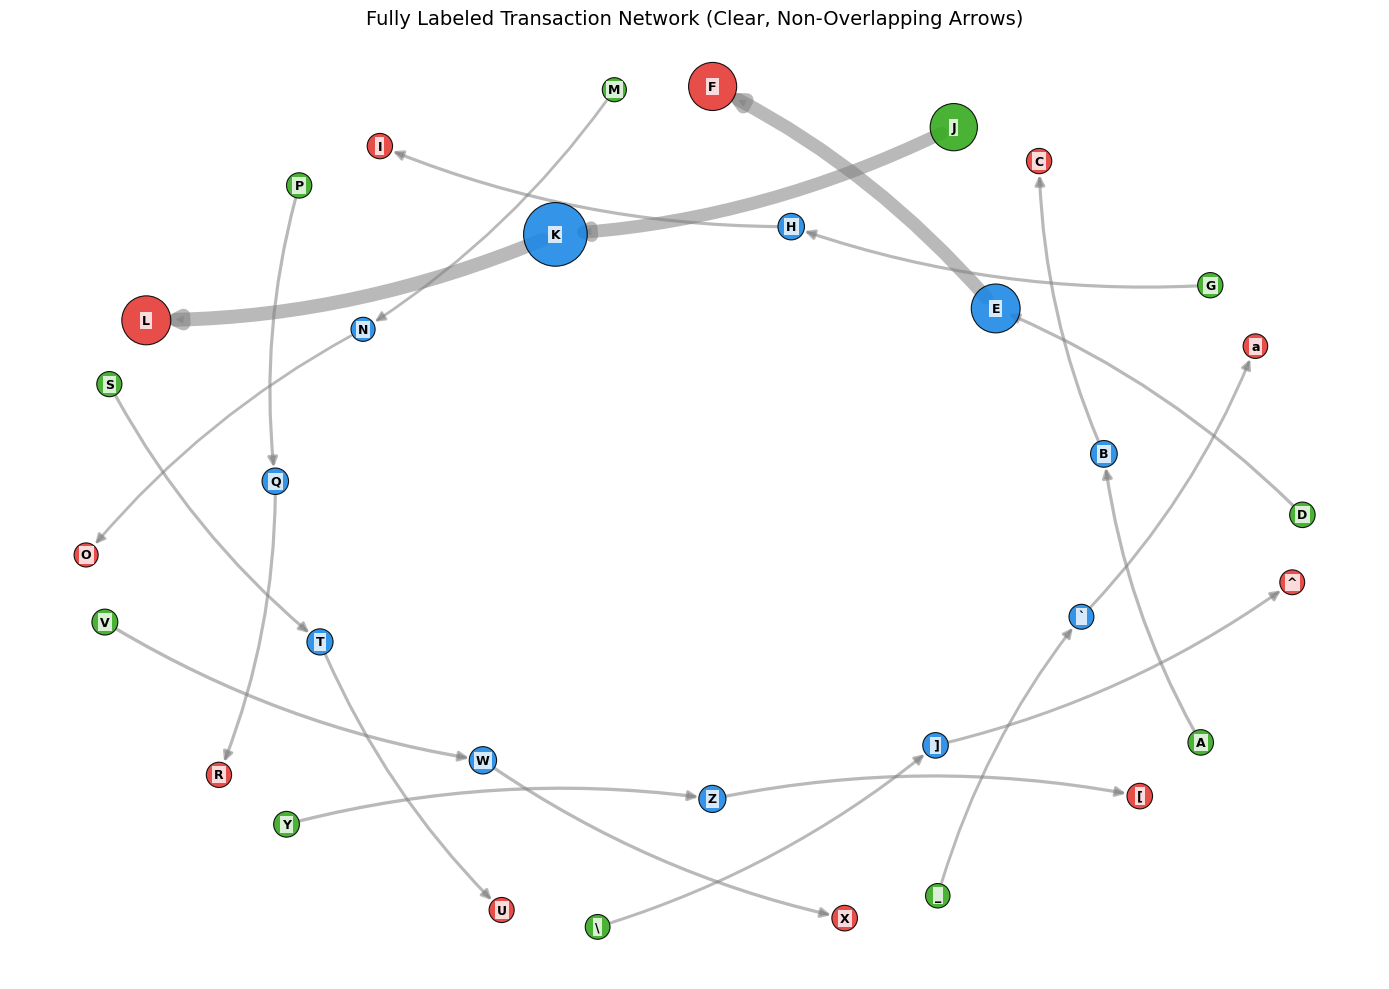

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# --- Build directed graph ---
G = nx.DiGraph()
node_map = {}
next_label = 65  # ASCII 'A'

for _, row in df.iterrows():
    sender = row["From_Node"]
    receiver = row["To_Node"]
    amount = row["amount"]
    currency = row["currency"]

    # Assign short labels
    if sender not in node_map:
        node_map[sender] = chr(next_label)
        next_label += 1
    if receiver not in node_map:
        node_map[receiver] = chr(next_label)
        next_label += 1

    G.add_edge(
        node_map[sender],
        node_map[receiver],
        amount=amount,
        currency=currency
    )

# --- Compute node metrics ---
# Total transaction volume (in + out)
activity = {
    n: sum(d["amount"] for _, _, d in G.in_edges(n, data=True)) +
       sum(d["amount"] for _, _, d in G.out_edges(n, data=True))
    for n in G.nodes()
}

# --- Node & edge styling ---
max_amt = max(nx.get_edge_attributes(G, "amount").values())

# FIX: include data=True to unpack (u, v, d)
edge_weights = [2 + (d["amount"] / max_amt) * 8 for _, _, d in G.edges(data=True)]  # thicker = larger tx

node_sizes = [300 + (activity[n] / max(activity.values())) * 1800 for n in G.nodes()]

# Color nodes by role: source (only sends), sink (only receives), intermediary (both)
node_colors = []
for n in G.nodes():
    in_deg = G.in_degree(n)
    out_deg = G.out_degree(n)
    if in_deg == 0:
        node_colors.append("#36AA1E")  # green source
    elif out_deg == 0:
        node_colors.append("#E53935")  # red sink
    else:
        node_colors.append("#1E88E5")  # blue intermediary

# --- Layout ---
# Kamada–Kawai layout tends to minimize node & edge overlap nicely
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(14, 10))

# --- Draw nodes ---
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.9,
    edgecolors="black",
    linewidths=0.8
)

# --- Draw edges with curvature & spacing ---
edges = list(G.edges(data=True))
for (u, v, d) in edges:
    width = 2 + (d["amount"] / max_amt) * 8
    
    # Curved edges for bidirectional relationships
    if G.has_edge(v, u):
        rad = 0.25 if hash((u, v)) % 2 == 0 else -0.25
    else:
        rad = 0.1 * np.sign(hash((u, v)) % 2 - 0.5)
    
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=width,
        edge_color="gray",
        alpha=0.55,
        arrows=True,
        arrowsize=14,
        connectionstyle=f"arc3,rad={rad}",
        min_source_margin=10,
        min_target_margin=10
    )

# --- Draw ALL labels with offset and white background ---
label_options = {
    "font_size": 9,
    "font_weight": "bold",
    "horizontalalignment": "center",
    "verticalalignment": "center",
    "bbox": dict(facecolor="white", edgecolor="none", alpha=0.8, pad=1.5)
}
nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes()}, **label_options)

# --- Final polish ---
plt.title("Fully Labeled Transaction Network (Clear, Non-Overlapping Arrows)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Ensure output directory exists
output_dir = os.path.join(current_dir, "entity_pattern_plots")
os.makedirs(output_dir, exist_ok=True)

# Load entity dataframe
entity_path = os.path.join(current_dir, "data", "IBM", "Hi-Small_accounts.csv")
entity_df = pd.read_csv(entity_path, dtype=str)
entity_df["Bank ID"] = entity_df["Bank ID"].astype(str).str.lstrip("0")

entity_df["bank_id"] = entity_df["Bank ID"].astype(str) + "_" + entity_df["Account Number"].astype(str)
print(entity_df.head())
cols = [
    "timestamp", "sender_id", "sender_acct", "receiver_id", "receiver_acct",
    "amount", "currency", "amount2", "currency2", "method", "flag"
]

for pattern_name, pattern_data in pattern_dict.items():
    # --- Parse into DataFrame ---
    df = pd.DataFrame(pattern_data)
    df.columns = cols

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["amount"] = df["amount"].astype(float)
    df["sender_id"]   = df["sender_id"].astype(str).str.lstrip("0")
    df["receiver_id"] = df["receiver_id"].astype(str).str.lstrip("0")

    df["From_Node"] = df["sender_id"].astype(str) + "_" + df["sender_acct"].astype(str)
    df["To_Node"] = df["receiver_id"].astype(str) + "_" + df["receiver_acct"].astype(str)

    # Merge sender entity
    merged_df = df.merge(
        entity_df[['bank_id', 'Entity ID']],
        how='left',
        left_on='From_Node',
        right_on='bank_id'
    ).rename(columns={'Entity ID': 'sender_entity'}).drop('bank_id', axis=1)

    # Merge receiver entity
    merged_df = merged_df.merge(
        entity_df[['bank_id', 'Entity ID']],
        how='left',
        left_on='To_Node',
        right_on='bank_id'
    ).rename(columns={'Entity ID': 'receiver_entity'}).drop('bank_id', axis=1)

    # --- Create directed graph ---
    G = nx.DiGraph()
    for _, row in merged_df.iterrows():
        sender = row["sender_entity"]
        receiver = row["receiver_entity"]
        amount = row["amount"]
        currency = row["currency"]

        if pd.isna(sender) or pd.isna(receiver):
            continue  # Skip if entity mapping is missing

        if G.has_edge(sender, receiver):
            G[sender][receiver]["weight"] += amount
        else:
            G.add_edge(sender, receiver, weight=amount, currency=currency)

    # --- Node sizes & edge widths ---
    node_sizes = [G.degree(n) * 300 for n in G.nodes()]
    max_amount = merged_df['amount'].max()
    edge_weights = [G[u][v]['weight'] / max_amount * 5 for u, v in G.edges()]

    # --- Plot graph ---
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6, arrowsize=15)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(f"Transaction Network Graph - {pattern_name}", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    
    # Save plot
    plot_path = os.path.join(output_dir, f"{pattern_name}.png")
    plt.savefig(plot_path, dpi=300)
    plt.close()

print(f"All plots saved in: {output_dir}")


                     Bank Name Bank ID Account Number  Entity ID  \
0          Portugal Bank #4507  331579      80B779D80  80062E240   
1              Canada Bank #27     210      809D86900  800C998A0   
2                  UK Bank #33   21884      80812BE00  800C47F50   
3           Germany Bank #4815   32742      81047F300  80096F0B0   
4  National Bank of Harrisburg  127390      80BD8CF00  800FB8760   

                  Entity Name           bank_id  
0  Sole Proprietorship #50438  331579_80B779D80  
1          Corporation #33520     210_809D86900  
2          Partnership #35397   21884_80812BE00  
3          Corporation #48813   32742_81047F300  
4            Corporation #889  127390_80BD8CF00  


C:\Users\lucsc\AppData\Local\Temp\ipykernel_17004\835388537.py:77: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6, arrowsize=15)
C:\Users\lucsc\AppData\Local\Temp\ipykernel_17004\835388537.py:77: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6, arrowsize=15)
C:\Users\lucsc\AppData\Local\Temp\ipykernel_17004\835388537.py:77: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6, arrowsize=15)
C:\Users\lucsc\AppData\Local\Temp\ipykernel_17004\835388537.py:77: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  

KeyboardInterrupt: 